In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import zipfile

In [17]:
data = fetch_20newsgroups()

In [18]:
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [19]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [20]:
categories = data.target_names

train = fetch_20newsgroups(subset='train' , categories=categories)
test = fetch_20newsgroups(subset='test' , categories=categories)

In [21]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [22]:
print(len(train.data))

11314


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


In [24]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)

labels = model.predict(test.data)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,test.target))

0.7738980350504514


Text(145.72222222222223, 0.5, 'predicted label')

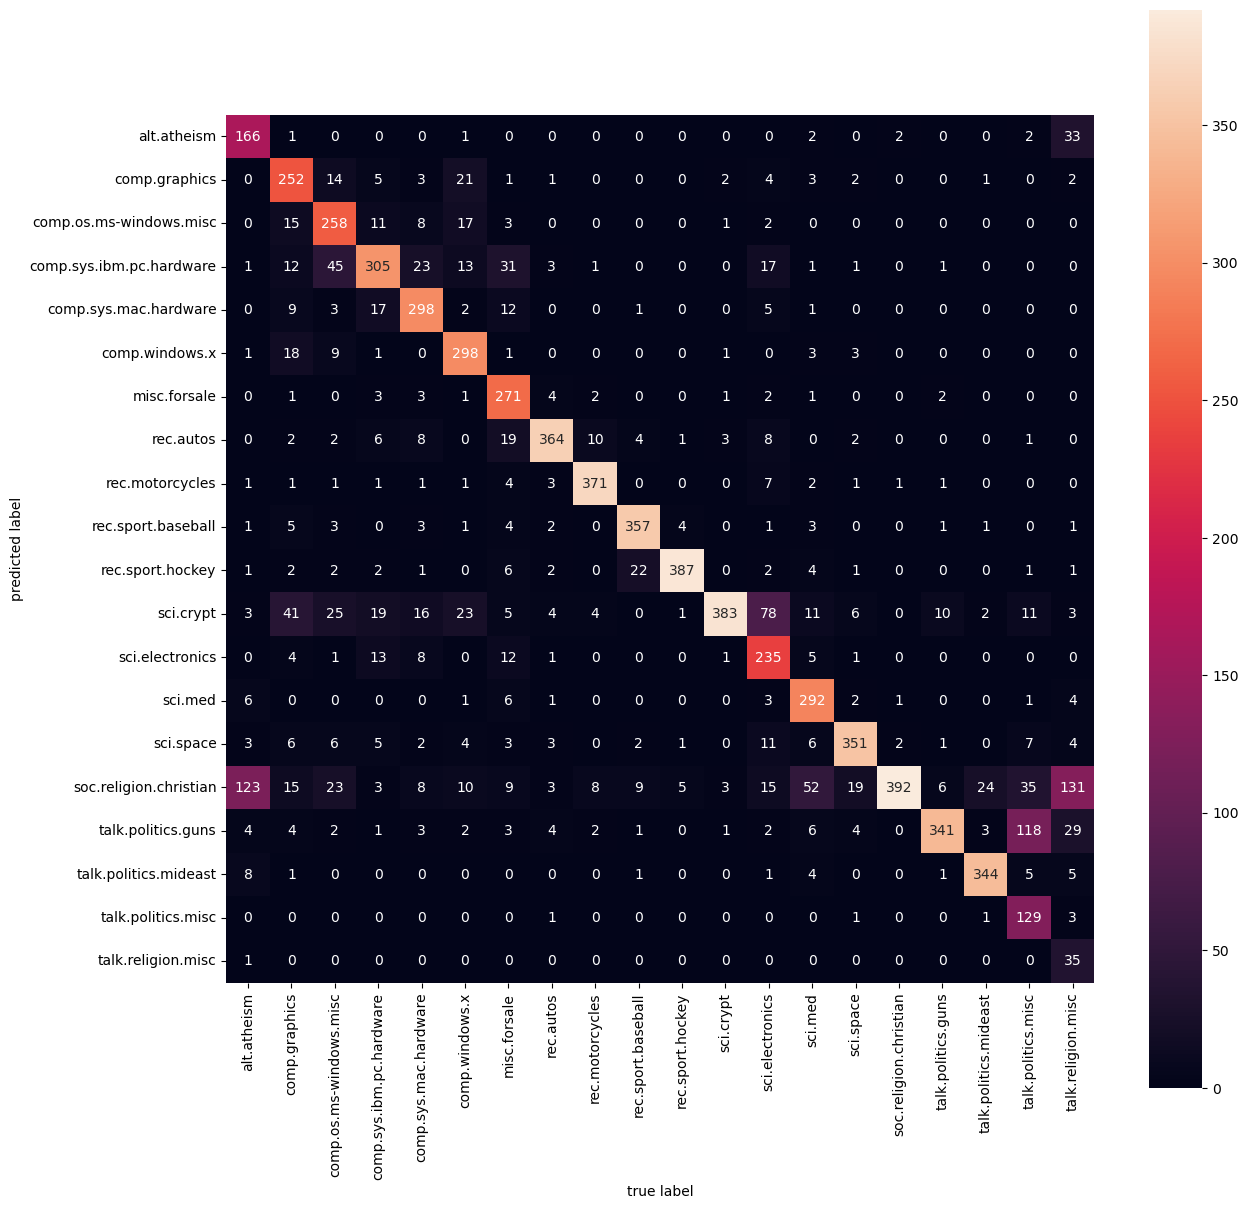

In [33]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14,14))
mat = confusion_matrix(test.target , labels)
sns.heatmap(mat.T , square=True , annot=True , fmt='d' , xticklabels=train.target_names , yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [34]:
def predict_category(s, train=train , model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [37]:
predict_category('computer hack')

'comp.sys.ibm.pc.hardware'

In [38]:
predict_category('BMW is better than Audi')

'rec.autos'

In [40]:
predict_category('president america')

'talk.politics.misc'